<a href="https://www.kaggle.com/code/mrsimple07/waiter-tip-analysis-prediction?scriptVersionId=163855267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waiter-tip-prediction/tips.csv


# Exploratory Data Analysis and Prediction: Waiter Tips Analysis

## Introduction

Welcome to this Kaggle notebook where we'll explore and analyze a dataset containing information about waiter tips. This dataset includes various features such as the total bill, gender of the customer, smoking status, day of the week, time of the meal, and party size. The objective of this analysis is twofold: first, we'll conduct an exploratory data analysis (EDA) to gain insights into the dataset and understand the relationships between different variables. Then, we'll use machine learning techniques to predict the tip amount based on the available features.

### Dataset Overview

The dataset we'll be working with contains the following columns:

- `total_bill`: Total bill amount (in dollars).
- `tip`: Tip amount provided by the customer (in dollars), which will be our target variable for prediction.
- `sex`: Gender of the customer (Male or Female).
- `smoker`: Smoking status of the customer (Yes or No).
- `day`: Day of the week (e.g., Sun, Sat).
- `time`: Time of the meal (Lunch or Dinner).
- `size`: Party size (number of people).

### Objectives

1. **Exploratory Data Analysis (EDA)**:
   - Visualize the distribution of tip amounts.
   - Explore the relationship between tip amount and other numerical features.
   - Investigate any patterns or trends in tipping behavior based on categorical variables.

2. **Prediction**:
   - Build a machine learning model to predict the tip amount based on the available features.
   - Evaluate the performance of the model using appropriate metrics.

Let's begin our analysis!

# Data importing and overall information

In [2]:
import pandas as pd
df= pd.read_csv('/kaggle/input/waiter-tip-prediction/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Checking missing values

In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Exploratory Data Analysis (EDA)

#### 1. Total tips based on smoking

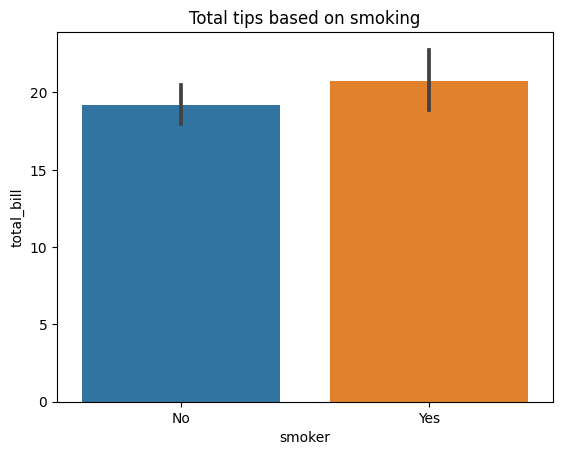

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.barplot(x = df['smoker'], y = df['total_bill'])
plt.title('Total tips based on smoking')
plt.show()

#### 2. Total tips based on days

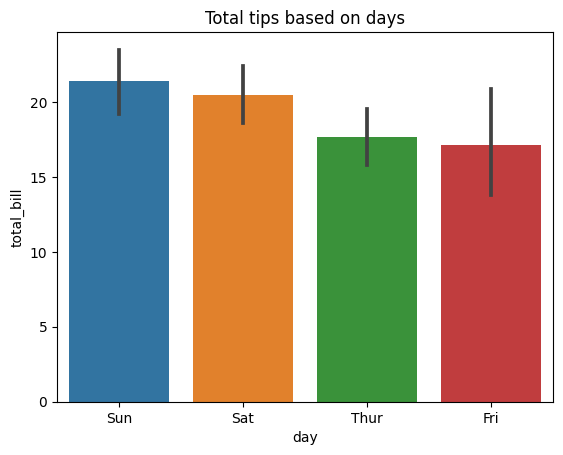

In [7]:
sns.barplot(x = df['day'], y = df['total_bill'])
plt.title('Total tips based on days')
plt.show()

#### 3. Total tips based on sex

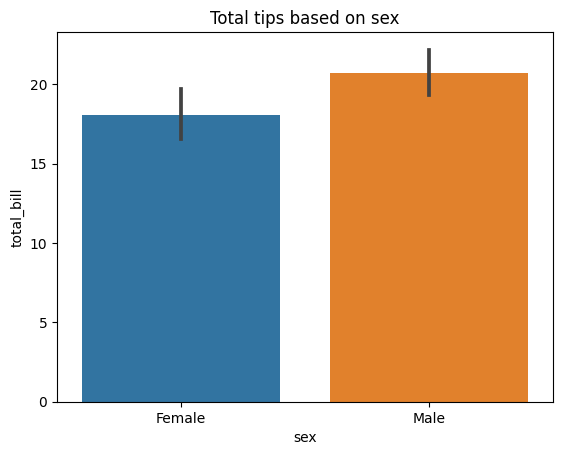

In [8]:
sns.barplot(x = df['sex'], y = df['total_bill'])
plt.title('Total tips based on sex')
plt.show()

#### 4. Correlation matrix of features

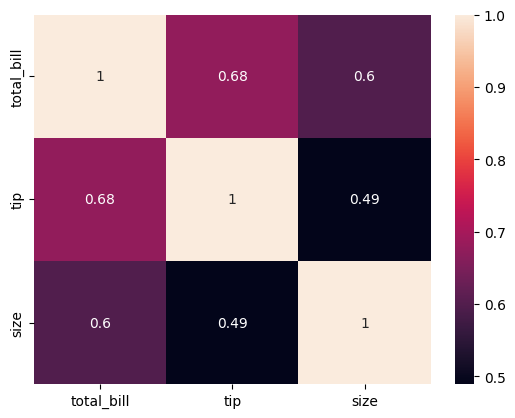

In [9]:
correlation_matrix = df[['total_bill','tip', 'size']].corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

#### 5. Distribution of Total Bill and Tip

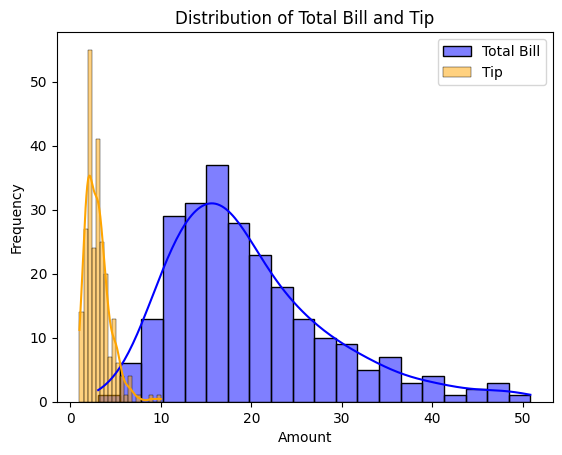

In [10]:
sns.histplot(df['total_bill'], bins=20, kde=True, color='blue', label='Total Bill')
sns.histplot(df['tip'], bins=20, kde=True, color='orange', label='Tip')
plt.title('Distribution of Total Bill and Tip')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 6. Boxplot of Total Bill by Day

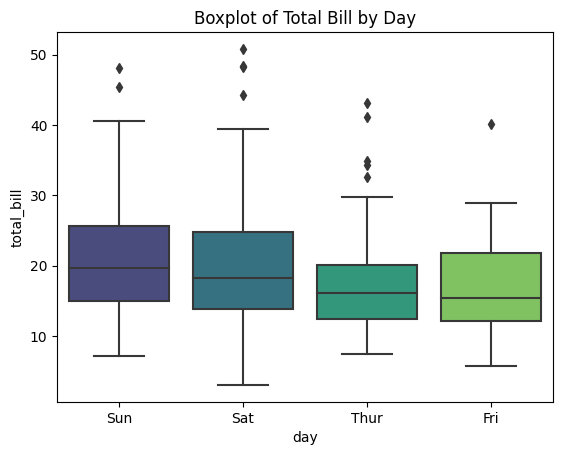

In [11]:
sns.boxplot(x='day', y='total_bill', data=df, palette='viridis')
plt.title('Boxplot of Total Bill by Day')
plt.show()

#### 7. Average Tip by Sex

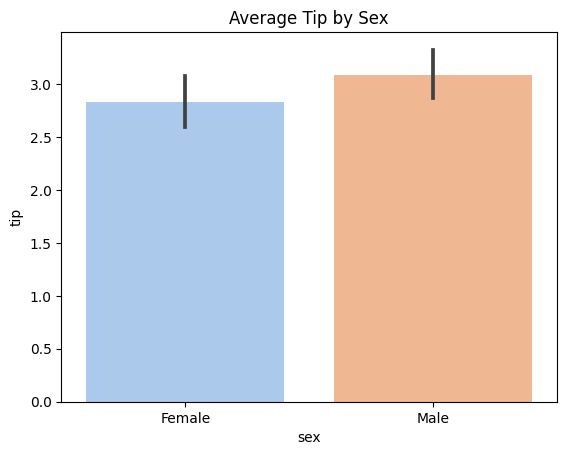

In [12]:
sns.barplot(x='sex', y='tip', data=df, palette='pastel')
plt.title('Average Tip by Sex')
plt.show()

# Model choosing and evaluation

## One - hot encoding

In [13]:
df= pd.get_dummies(df, columns = ['sex', 'smoker', 'day','time'], drop_first =True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


## Prediction with Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

X, y = df.drop(['tip'], axis=1), df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [15]:
print(mean_squared_error(y_test, y_pred))

0.7033566017436106


# Prediction with Random Forest

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9196720148979602


# Prediction with Decission Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.1674408163265306


# Prediction using Catboost

In [18]:
from catboost import CatBoostRegressor


catboost_model = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='RMSE')

catboost_model.fit(X_train, y_train, verbose=100)
y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

0:	learn: 1.3771801	total: 55.3ms	remaining: 55.2s
100:	learn: 0.6363412	total: 88.7ms	remaining: 790ms
200:	learn: 0.4773684	total: 123ms	remaining: 489ms
300:	learn: 0.3907542	total: 178ms	remaining: 413ms
400:	learn: 0.3269190	total: 234ms	remaining: 350ms
500:	learn: 0.2808958	total: 293ms	remaining: 292ms
600:	learn: 0.2405860	total: 350ms	remaining: 232ms
700:	learn: 0.2108801	total: 407ms	remaining: 173ms
800:	learn: 0.1816183	total: 463ms	remaining: 115ms
900:	learn: 0.1564399	total: 520ms	remaining: 57.2ms
999:	learn: 0.1367490	total: 578ms	remaining: 0us
Mean Squared Error: 0.7577128613225147


# Prediction using LightGBM

In [19]:
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

lgb_model = lgb.train(params,
                      lgb_train,
                      num_boost_round=1000,
                      valid_sets=lgb_eval,
                      early_stopping_rounds=10,
                      verbose_eval=100)

y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl